***DIGIT RECOGNIZER USING KERAS CNN***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing all the important modules of data preprocessing and data visualiztion.

In [2]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reading the training and test datasets. 

In [4]:
test = test.iloc[:].values
test = test / 255.0
test = test.reshape(-1 , 28, 28, 1)
test.shape

(28000, 28, 28, 1)

Since, our test data doesn't contain any label, I just normalized and reshaped to 28 X 28 X 1

In [5]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values
X = X / 255.0

I performed a grayscale normalization to reduce the effect of illumination's differences.

In [6]:
X = X.reshape(-1 , 28, 28, 1)
print X.shape

(42000, 28, 28, 1)


Taking out the label, and reshaping to 28 X 28 X 1.

Label : 0


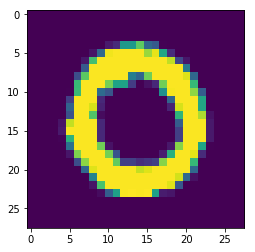

In [7]:
#example
plt.imshow(X[1][:,:,0])
print "Label :", y[1]

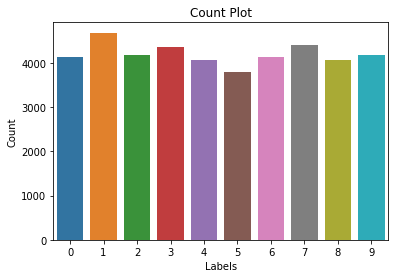

In [8]:
sns.countplot(y)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

From the count plot, it is clear that the data is almost uniformly distributed.

In [9]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, num_classes=10)
y[0]

Using TensorFlow backend.


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Converting the label column into 10 columns i.e., label encoding, where each column represents a label and set to 1, when it is that value, otherwise 0.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Splitting the data into 9:1 ratio, where 10% is used for validation.

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Importing all the Keras packages.

In [12]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (5, 5), input_shape = (28, 28, 1), activation = 'relu', padding='same'))
classifier.add(Conv2D(32, (5, 5), activation = 'relu', padding='same'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

Adding the first convolution layer. I have used the 'same' padding and 'ReLu' as my activation function. 

In [13]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu',padding='same'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

In [14]:
# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu',padding='same'))
classifier.add(Conv2D(128, (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

After some experimentations with convolution layers, these layers give more accuracy. We put a 5 X 5 kernal for the first layer with 32 filters. For the second and third layer, we set 3 X 3 kernal and 64 and 128 filters respectively. Here, I am referring one layer as 2 Convolution layers, 1 Max Pooling layer and one dropout layer. The reason to use a dropout layer is to tell my model to learn in a distributed way.

In [15]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10, activation = 'softmax'))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compiling the CNN
classifier.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

After some experiments, I choosed the RMS prop as my optimizer. I referenced it from other sources.

In [16]:
history = classifier.fit(X_train, y_train, batch_size = 90, epochs = 10,validation_data = (X_test, y_test), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 870s - loss: 0.3683 - acc: 0.8829 - val_loss: 0.0796 - val_acc: 0.9781
Epoch 2/10
 - 888s - loss: 0.0824 - acc: 0.9761 - val_loss: 0.0444 - val_acc: 0.9855
Epoch 3/10
 - 870s - loss: 0.0615 - acc: 0.9829 - val_loss: 0.0385 - val_acc: 0.9883
Epoch 4/10
 - 880s - loss: 0.0492 - acc: 0.9861 - val_loss: 0.0431 - val_acc: 0.9876
Epoch 5/10
 - 979s - loss: 0.0452 - acc: 0.9870 - val_loss: 0.0327 - val_acc: 0.9907
Epoch 6/10
 - 985s - loss: 0.0376 - acc: 0.9893 - val_loss: 0.0350 - val_acc: 0.9917
Epoch 7/10
 - 987s - loss: 0.0371 - acc: 0.9896 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 8/10
 - 1090s - loss: 0.0344 - acc: 0.9905 - val_loss: 0.0310 - val_acc: 0.9907
Epoch 9/10
 - 982s - loss: 0.0339 - acc: 0.9909 - val_loss: 0.0403 - val_acc: 0.9921
Epoch 10/10
 - 902s - loss: 0.0327 - acc: 0.9912 - val_loss: 0.0486 - val_acc: 0.9871


With 10 epochs and 2 verbose, I trained the model.

In [17]:
# predict results
results = classifier.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [18]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("result.csv",index=False)

Predicting new result on test data and saving into csv file.